In [37]:
import matplotlib.pylab as plt
import seaborn as sns

import torch
from transformers import *

In [2]:
import numpy as np
import pandas as pd

STORY = "pieman" # pieman, 21st_year


In [3]:
# Ensure that we re-load changes automagically
%load_ext autoreload
%autoreload 2

from transformer_utils import TransformerRSM

tbm = TransformerRSM(stimulus_name='pieman', model_name='bert-base-uncased')


Looking for TR-aligned tokens in data/stimuli/pieman/tr_tokens.csv
Loaded 277 TRs.


In [6]:
tbm.process_stimulus_activations()

Processed 277 TRs for activations.


In [26]:
foo = tbm.tr_activations_array

In [32]:
baz = tbm.mean_tr_response_across_tokens(foo)
bar = tbm.layerwise_rsms_from_vectors(baz)

In [49]:
foobar = tbm.max_l2_move_per_layer(foo)
# pd.DataFrame(foobar)

rsms = tbm.layerwise_rsms_from_scalars(foobar)

<AxesSubplot:>

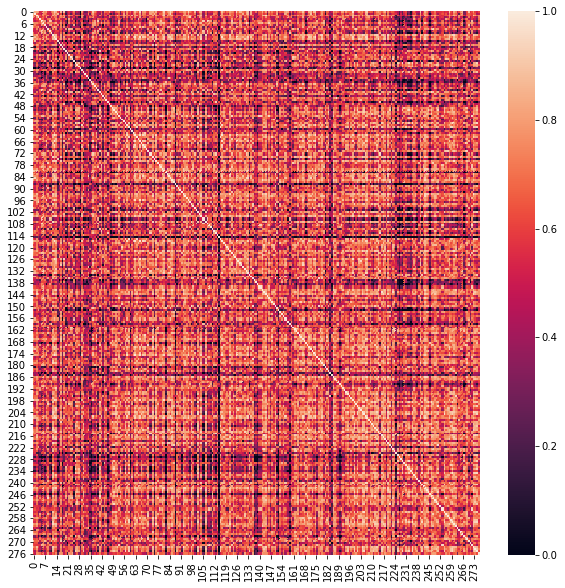

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(rsms, vmin=0, vmax=1)

In [85]:
token_stimulus_df.n_tokens.describe()

count    277.000000
mean       3.454874
std        2.127022
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       12.000000
Name: n_tokens, dtype: float64

In [86]:
token_stimulus_df.n_tokens.value_counts().sort_index()

0.0     23
1.0     23
2.0     48
3.0     59
4.0     44
5.0     41
6.0     18
7.0      4
8.0     12
9.0      4
12.0     1
Name: n_tokens, dtype: int64

In [13]:
import os 

destination_path = "data/{}/{}/{}".format(STORY, bert_weights, ANALYSIS_NAME)
try:
    os.mkdir(destination_path)
except:
    pass

for i, df in enumerate(activation_rsm_dfs):
    np_array = df.to_numpy()
    np.save("data/{}/{}/{}/layer_{}_rsm.npy".format(STORY, bert_weights, ANALYSIS_NAME, i), np_array)

In [14]:
# Copying to PNI

print("Run from {} directory:".format(bert_weights))
print('\tscp -r {} tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/{}/{}/'.format(ANALYSIS_NAME, STORY, bert_weights))

print("\nTo check results:\n\t ssh tsumers@apps.pni.princeton.edu")

Run from bert-base-uncased directory:
	scp -r all_activations tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/pieman/bert-base-uncased/

To check results:
	 ssh tsumers@apps.pni.princeton.edu


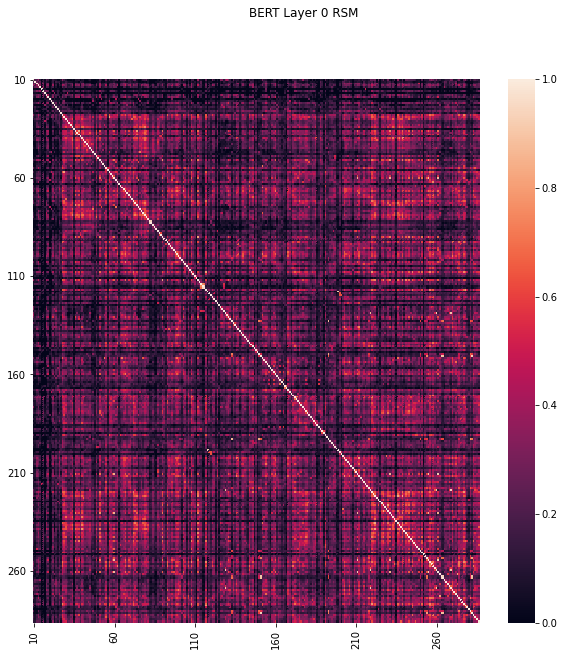

In [94]:
import matplotlib.pylab as plt
import seaborn as sns

tick_labels = "tr" # story_section (for 21st_year); tr
tick_interval = 50 # 50, 100, 200

plt.figure(figsize=(10,10))
ax = sns.heatmap(activation_rsm_dfs[0], xticklabels=token_stimulus_df[tick_labels], yticklabels=token_stimulus_df[tick_labels], vmin=0, vmax=1)

ax.set_xticks(ax.get_xticks()[::tick_interval])
ax.set_yticks(ax.get_yticks()[::tick_interval])
plt.suptitle("BERT Layer 0 RSM");

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(activation_rsm_dfs[5], xticklabels=token_stimulus_df[tick_labels], yticklabels=token_stimulus_df[tick_labels], vmin=0, vmax=1)

ax.set_xticks(ax.get_xticks()[::tick_interval])
ax.set_yticks(ax.get_yticks()[::tick_interval])

plt.suptitle("BERT Layer 6 RSM");